### This is an anonymized, binary classification dataset found on a USB stick that washed ashore in a bottle.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv("../data/input/train.csv")
test = pd.read_csv("../data/input/test.csv")

In [3]:
print(train.shape, test.shape)

(262144, 258) (131073, 257)


In [4]:
train.head()

,id,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,...,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert,target
0,707b395ecdcbb4dc2eabea00e4d1b179,-2.070654,1.018160,0.228643,0.857221,0.052271,0.230303,-6.385090,0.439369,-0.721946,...,0.351895,0.618824,-1.542423,0.598175,0.611757,0.678772,0.247059,-0.806677,-0.193649,0
1,5880c03c6582a7b42248668e56b4bdec,-0.491702,0.082645,-0.011193,1.071266,-0.346347,-0.082209,0.110579,-0.382374,-0.229620,...,-0.645115,-1.246090,2.613357,-0.479664,1.581289,0.931258,0.151937,-0.766595,0.474351,0
2,4ccbcb3d13e5072ff1d9c61afe2c4f77,-1.680473,0.860529,-1.076195,0.740124,3.678445,0.288558,0.515875,0.920590,-1.223277,...,0.516422,0.130521,-0.459210,2.028205,-0.093968,-0.218274,-0.163136,-0.870289,0.064038,1
3,e350f17a357f12a1941f0837afb7eb8d,0.183774,0.919134,-0.946958,0.918492,0.862278,1.155287,0.911106,0.562598,-1.349685,...,-1.168967,1.385089,-0.353028,3.316150,-0.524087,-0.794327,3.936365,0.682989,-2.521211,0
4,a8f910ea6075b6376af079055965ff68,-0.203933,-0.177252,0.368074,-0.701320,-1.104391,0.735760,0.894273,-1.375826,-5.144946,...,-0.279168,1.544356,2.959727,1.641201,-0.130818,-0.264292,-0.748668,0.964218,0.087079,0


In [5]:
target = train["target"]
train_id = train["id"]
test_id = test["id"]

train.drop(["id", "target"], axis=1, inplace=True)
test.drop(["id"], axis=1, inplace=True)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262144 entries, 0 to 262143
Columns: 256 entries, muggy-smalt-axolotl-pembus to gamy-white-monster-expert
dtypes: float64(255), int64(1)
memory usage: 512.0 MB


In [7]:
train.describe()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,...,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert
count,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,...,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000,262144.000000
mean,0.005924,0.000936,-0.012530,-0.005688,0.001607,0.007878,-0.003500,-0.005927,0.002664,0.020485,...,-0.007541,-0.002670,-0.011401,0.007895,0.000651,-0.002613,0.002351,-0.011684,-0.007153,-0.004066
std,1.706660,1.720943,1.698693,1.874875,1.726869,1.734646,1.720431,1.693276,1.872248,1.645070,...,1.734388,1.799308,1.788832,1.775853,1.703296,1.692972,1.742284,1.698231,1.759408,1.661463
min,-15.588429,-15.644144,-15.235982,-15.672966,-16.800626,-14.789422,-15.591329,-15.696478,-17.011807,-14.693510,...,-14.209051,-16.740804,-17.681945,-15.705197,-15.765274,-15.604682,-16.965775,-15.064518,-16.145154,-16.815640
25%,-0.765404,-0.770224,-0.777421,-0.802502,-0.770838,-0.771608,-0.770634,-0.764398,-0.795475,-0.756594,...,-0.777831,-0.782944,-0.788437,-0.778580,-0.767367,-0.764199,-0.770457,-0.768885,-0.785702,-0.766552
50%,0.002148,0.003543,-0.005771,-0.003505,0.000866,0.002830,0.001257,-0.003657,0.004936,0.004372,...,-0.007404,-0.002239,-0.004543,-0.000675,0.000771,-0.000331,-0.000617,-0.005634,-0.004459,-0.004471
75%,0.769228,0.773400,0.764092,0.798460,0.769954,0.776606,0.769794,0.752836,0.800376,0.764807,...,0.770104,0.786180,0.776178,0.788910,0.769277,0.764115,0.773100,0.753518,0.774197,0.758012
max,15.797000,18.577178,17.205310,16.585173,16.815798,17.378922,15.202100,16.645394,19.396192,17.131375,...,16.727533,15.511936,16.252503,16.387990,16.260286,14.748128,16.212146,18.866005,18.811832,17.302211


In [8]:
test.describe()

,muggy-smalt-axolotl-pembus,dorky-peach-sheepdog-ordinal,slimy-seashell-cassowary-goose,snazzy-harlequin-chicken-distraction,frumpy-smalt-mau-ordinal,stealthy-beige-pinscher-golden,chummy-cream-tarantula-entropy,hazy-emerald-cuttlefish-unsorted,nerdy-indigo-wolfhound-sorted,leaky-amaranth-lizard-sorted,...,goopy-lavender-wolverine-fimbus,wheezy-myrtle-mandrill-entropy,wiggy-lilac-lemming-sorted,gloppy-cerise-snail-contributor,woozy-silver-havanese-gaussian,jumpy-thistle-discus-sorted,muggy-turquoise-donkey-important,blurry-buff-hyena-entropy,bluesy-chocolate-kudu-fepid,gamy-white-monster-expert
count,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,...,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000,131073.000000
mean,0.000717,-0.001042,-0.014509,-0.007666,0.003343,0.001975,-0.003154,-0.003252,-0.000867,0.021517,...,-0.013755,0.005354,-0.020082,0.006930,0.000292,-0.007900,0.002057,-0.004680,-0.008654,-0.002005
std,1.699679,1.709003,1.719370,1.879385,1.722578,1.732991,1.714599,1.705527,1.873493,1.659417,...,1.736534,1.813079,1.792759,1.785155,1.699677,1.702486,1.743466,1.692141,1.754239,1.658424
min,-14.245150,-14.969302,-15.644789,-15.317885,-13.868563,-15.069234,-14.442981,-15.629350,-16.541054,-15.192912,...,-18.912881,-15.810240,-17.766837,-15.972805,-15.532943,-15.335189,-18.468645,-16.367450,-17.031412,-14.311122
25%,-0.772185,-0.763243,-0.777554,-0.807603,-0.770489,-0.770245,-0.769999,-0.766269,-0.803021,-0.750019,...,-0.781760,-0.780773,-0.790223,-0.782018,-0.766595,-0.771308,-0.765511,-0.763573,-0.772154,-0.758637
50%,-0.000262,-0.003182,-0.010306,-0.002272,-0.001813,0.001427,-0.002228,-0.002989,0.001282,0.012836,...,-0.002722,0.004962,-0.004812,0.006046,-0.001672,-0.000148,0.005168,-0.002962,-0.007699,-0.000606
75%,0.769554,0.766639,0.762199,0.795085,0.765854,0.777691,0.764469,0.762876,0.800334,0.776556,...,0.765721,0.792530,0.773891,0.782809,0.763536,0.762064,0.774573,0.760232,0.768171,0.752969
max,15.087623,18.275276,17.031018,15.664353,15.336497,14.935782,16.241070,15.638891,16.659055,16.760688,...,15.937640,18.054682,20.947841,15.114810,13.731920,16.107915,13.652250,17.717546,18.749135,17.330005


<ul>
<li>means of variables are all around zero</li>
<li>std of variables are all around 1.6-1.8</li>
<li>somewhat standadized data?</li>

In [9]:
train.isnull().sum(axis=0).sum()

0

In [10]:
test.isnull().sum(axis=0).sum()

0

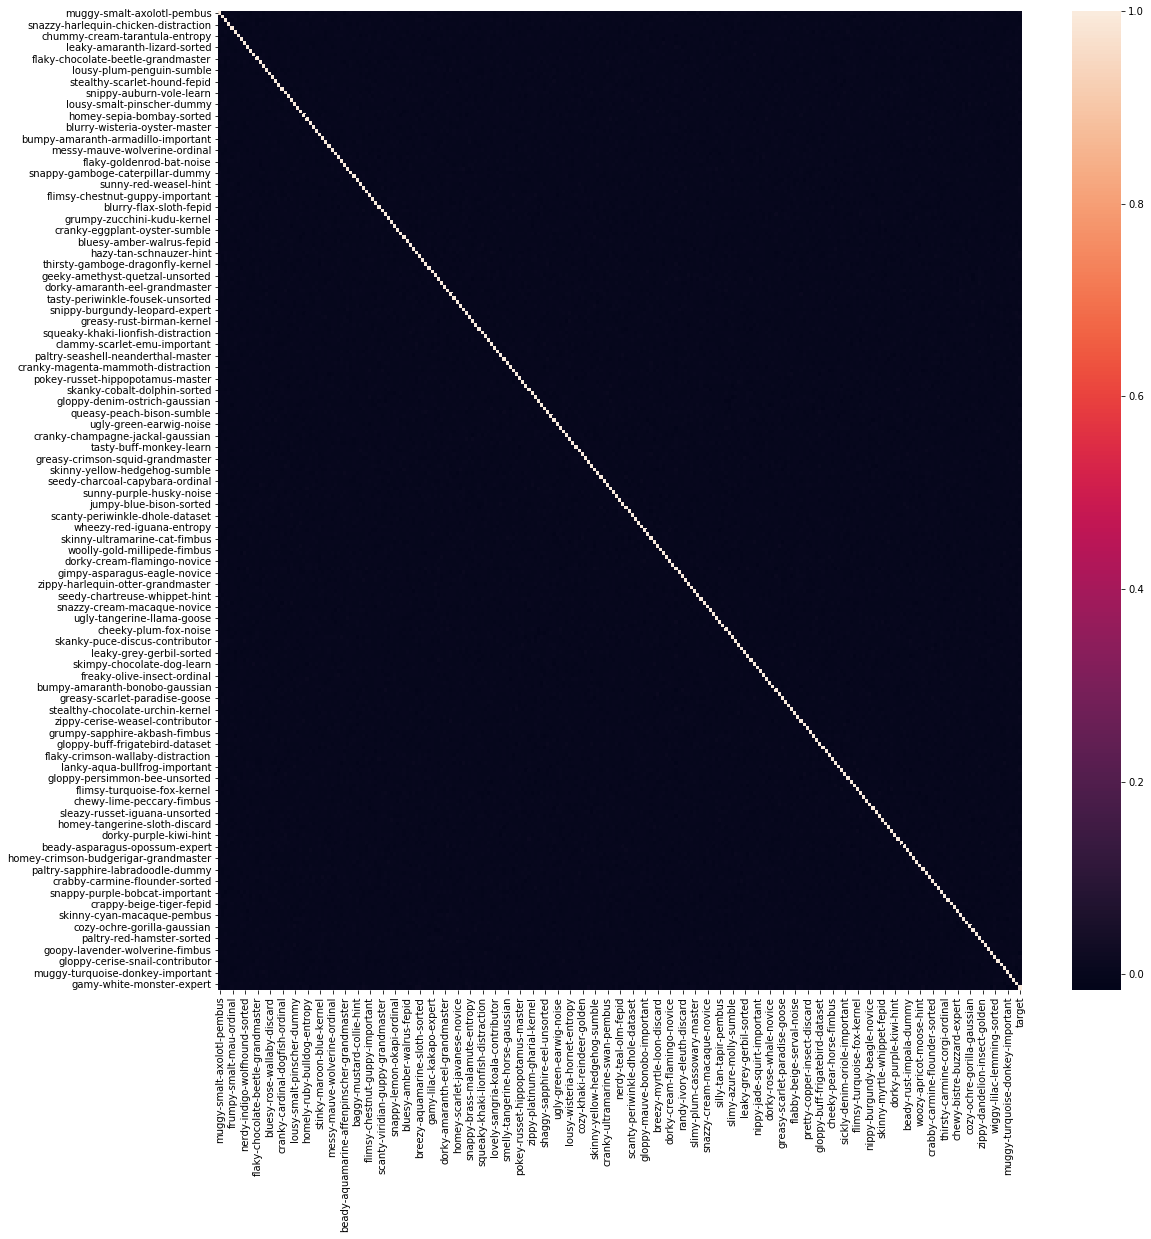

In [11]:
plt.figure(figsize=(18, 18))
sns.heatmap(pd.concat([train, target], axis=1).corr())

<li>no correlation between varibales</li> 

In [37]:
cols = train.columns

def plot_distribution(df, feats, label1, label2):
    #plot distributions of 16 features at a time, devided by target
    df1 = df[target == label1]
    df2 = df[target == label2]
    fig = plt.figure(figsize=(14, 14))
    fig.subplots_adjust(wspace=0.5, hspace=0.4)
    for idx, feat in enumerate(feats):
        ax = fig.add_subplot(4, 4, idx+1)
        #ax.hist(df[feat], bins=100)
        sns.distplot(df1[feat], hist=False, label=label1)
        sns.distplot(df2[feat], hist=False, label=label2)
        ax.set_title(feat)
        ax.legend()

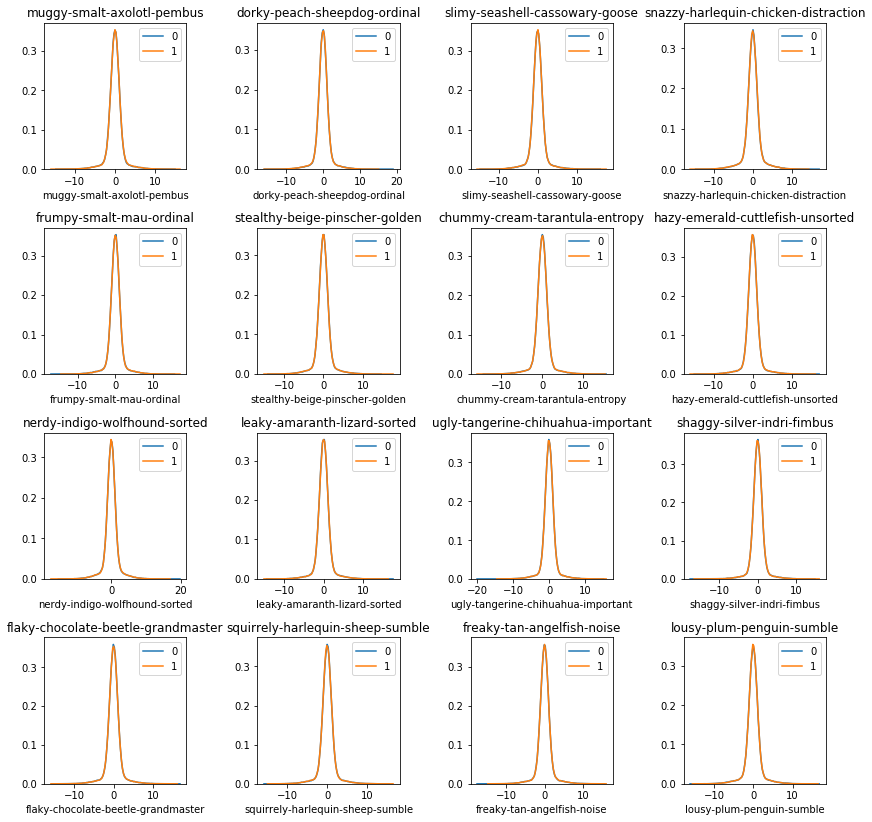

In [38]:
plot_distribution(train, cols[:16], 0, 1)

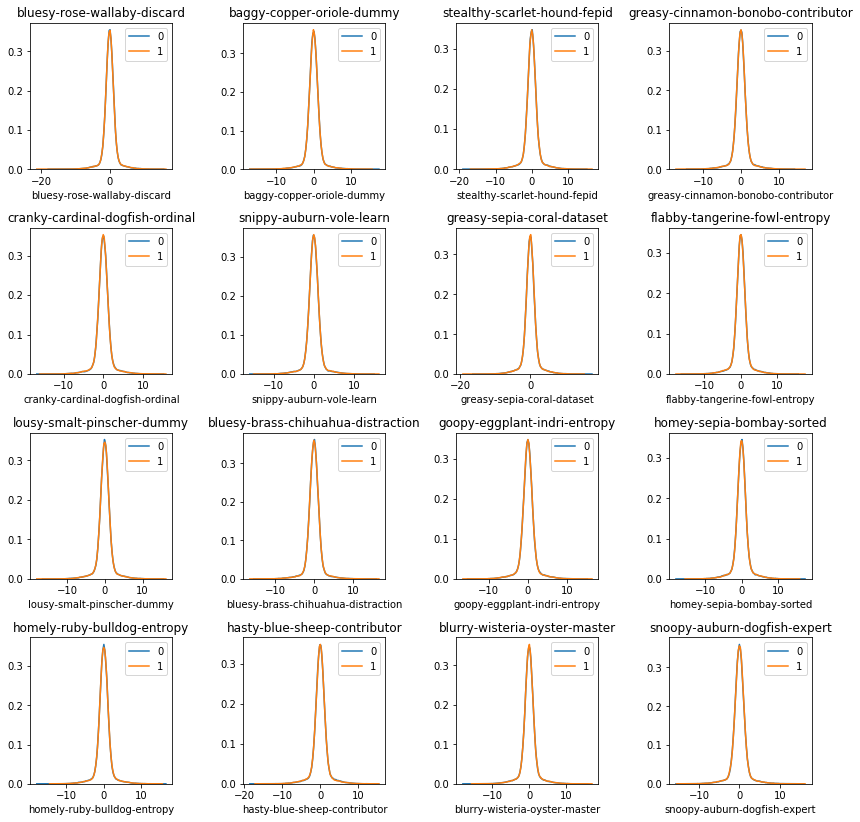

In [39]:
plot_distribution(train, cols[16:32], 0, 1)

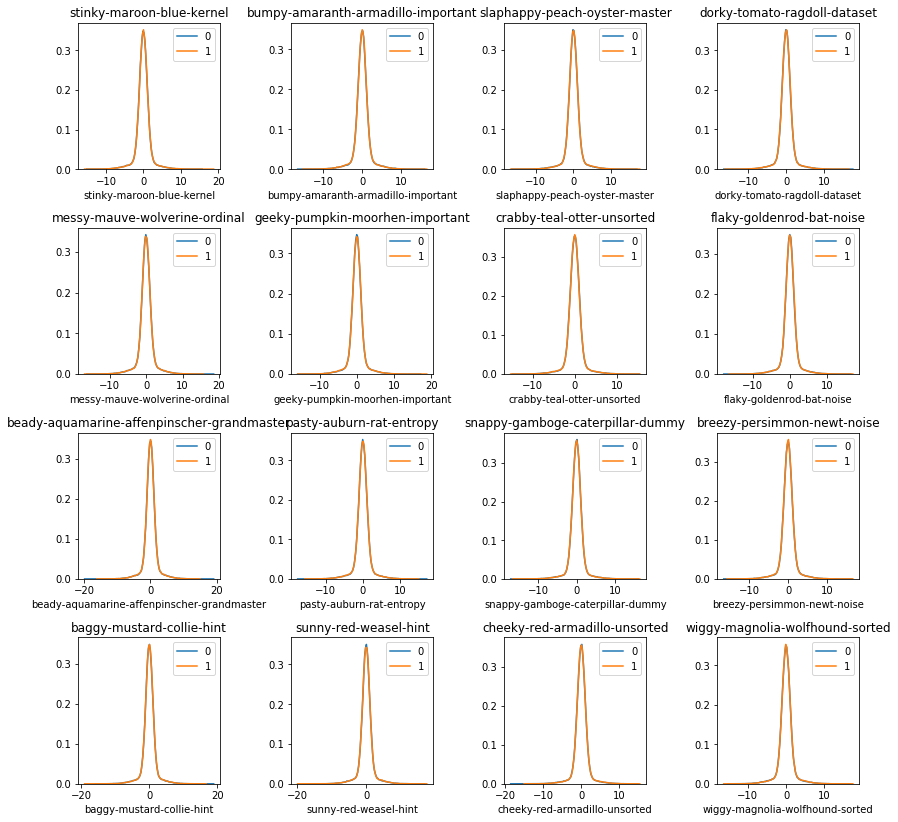

In [40]:
plot_distribution(train, cols[32:48], 0, 1)

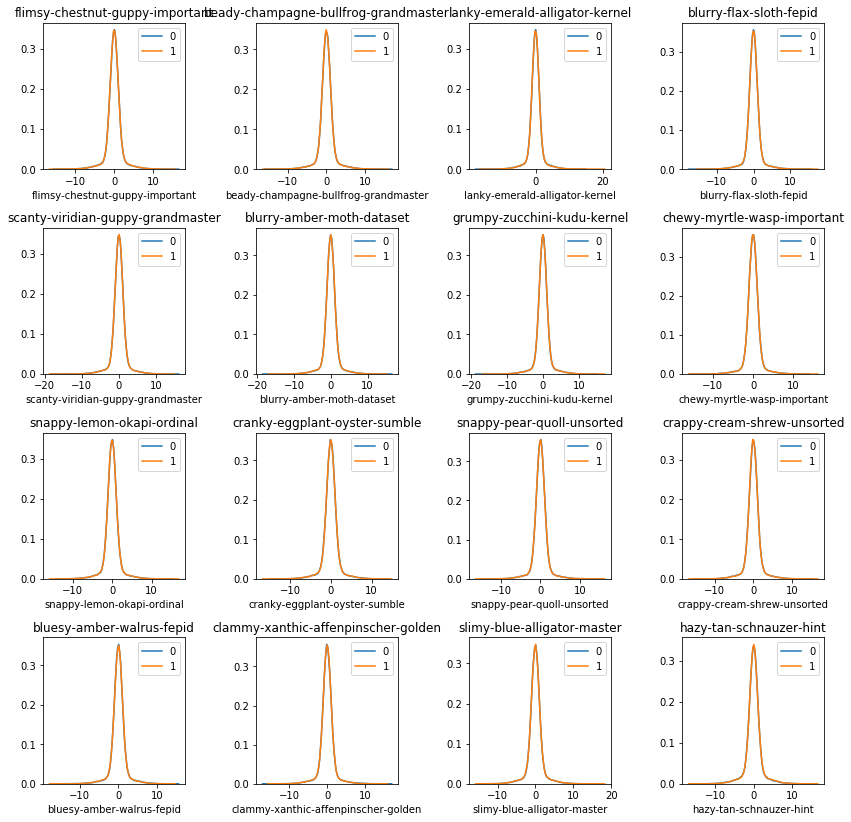

In [41]:
plot_distribution(train, cols[48:64], 0, 1)

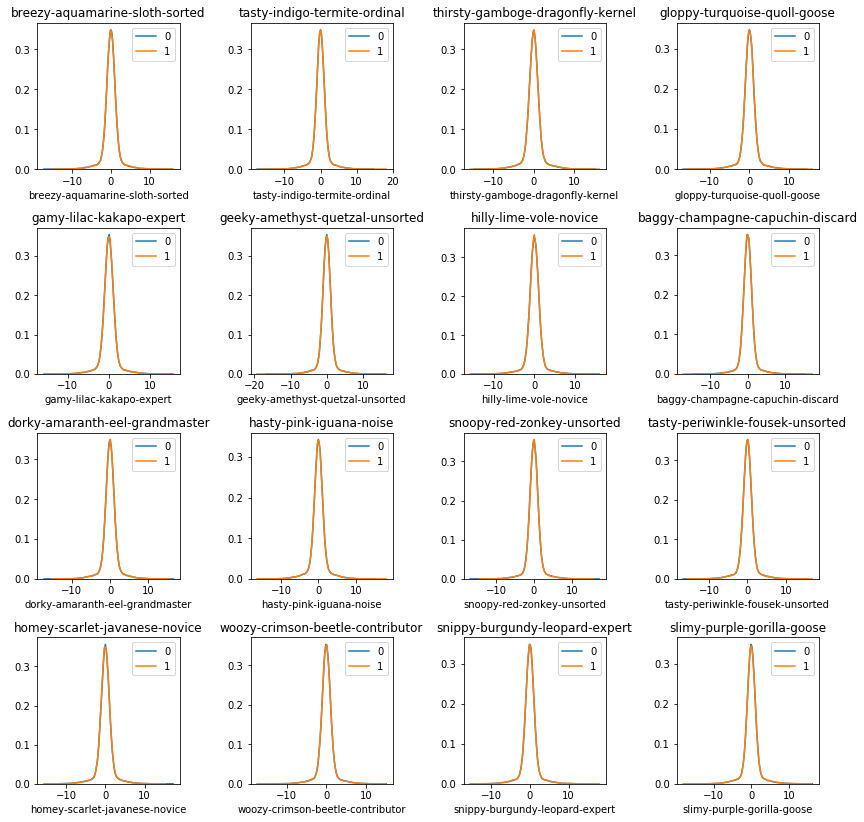

In [42]:
plot_distribution(train, cols[64:80], 0, 1)

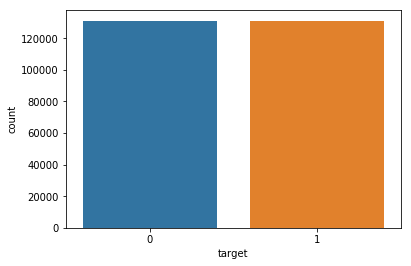

In [43]:
sns.countplot(target)

<li>very balanced dataset</li> 